In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [41]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

- посмотри сколько разных мест назначения
- разбей признак Cabin на три признака (по слэшам). Первый и третий категориальные, второй - численный
- разбей имя фамилию

In [42]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


категориальный признак:
- обозначает факт о данном объекте
- принимает дискретные значения
- нет операции сравнения между собой
- нет других математических операций

порядковые признаки:
- есть операция сравнения
- другие математические операции не определены (пример: уровень образования)

численный признак:
- лежит на R
- определены сложение, умножение итд

In [43]:
cat_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
cols_2_drop = ["PassengerId"]      # колонки, которые надо удалить
cols_2_split = ['Name', 'Cabin']   # колонки, которые надо разбить на подколонки
target = ['Transported']

### Распределение таргета

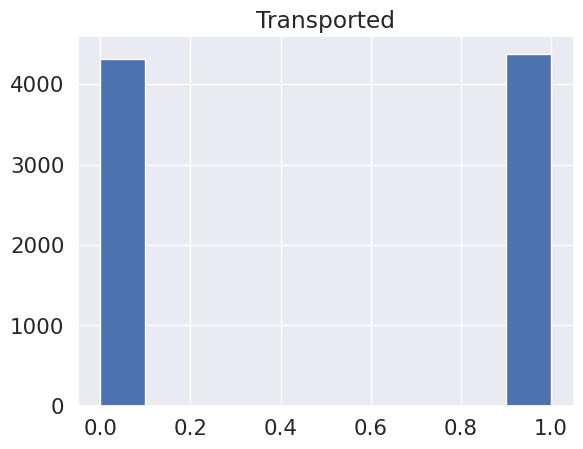

In [75]:
train[target].astype(int).hist();

In [45]:
train[target].value_counts()

Transported
True           4378
False          4315
dtype: int64

In [46]:
for col in train.columns:
    print(col, train[col].isna().sum())

PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


In [50]:
train[['FirstName', 'LastName']] = train["Name"].str.split(" ", expand = True)
train.drop("Name", axis = 1, inplace=True)

train[['Cabin1', 'Cabin2', "Cabin3"]] = train["Cabin"].str.split("/", expand = True)
train.drop("Cabin", axis = 1, inplace=True)

train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,Cabin1,Cabin2,Cabin3
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Gravior,Noxnuther,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Kurta,Mondalley,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Fayey,Connon,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Celeon,Hontichre,E,608,S


In [51]:
cat_cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP","Name"]
#cat_cols.append(["FirstName", "LastName", "Cabin1", "Cabin2", "Cabin3"])
#cat_cols.remove("Name")
#cat_cols.remove("Cabin")

#replace = lambda a,b,i: a[:i] + b + a[i+len(b):]
#cat_cols = replace(cat_cols, ["FirstName", "LastName"], cat_cols.index("Name"))
#cat_cols = replace(cat_cols, ["Cabin1", "Cabin2", "Cabin3"], cat_cols.index("Name"))

#cat_cols = list(map(lambda x: x.replace('Name', ["FirstName", "LastName"]), cat_cols))

from functools import reduce
cat_cols = reduce(lambda a, b: a + ["FirstName", "LastName"] if b == 'Name' else a + [b], cat_cols , [])
cat_cols = reduce(lambda a, b: a + ["Cabin1", "Cabin2", "Cabin3"] if b == 'Cabin' else a + [b], cat_cols , [])

cat_cols

['HomePlanet',
 'CryoSleep',
 'Cabin1',
 'Cabin2',
 'Cabin3',
 'Destination',
 'VIP',
 'FirstName',
 'LastName']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


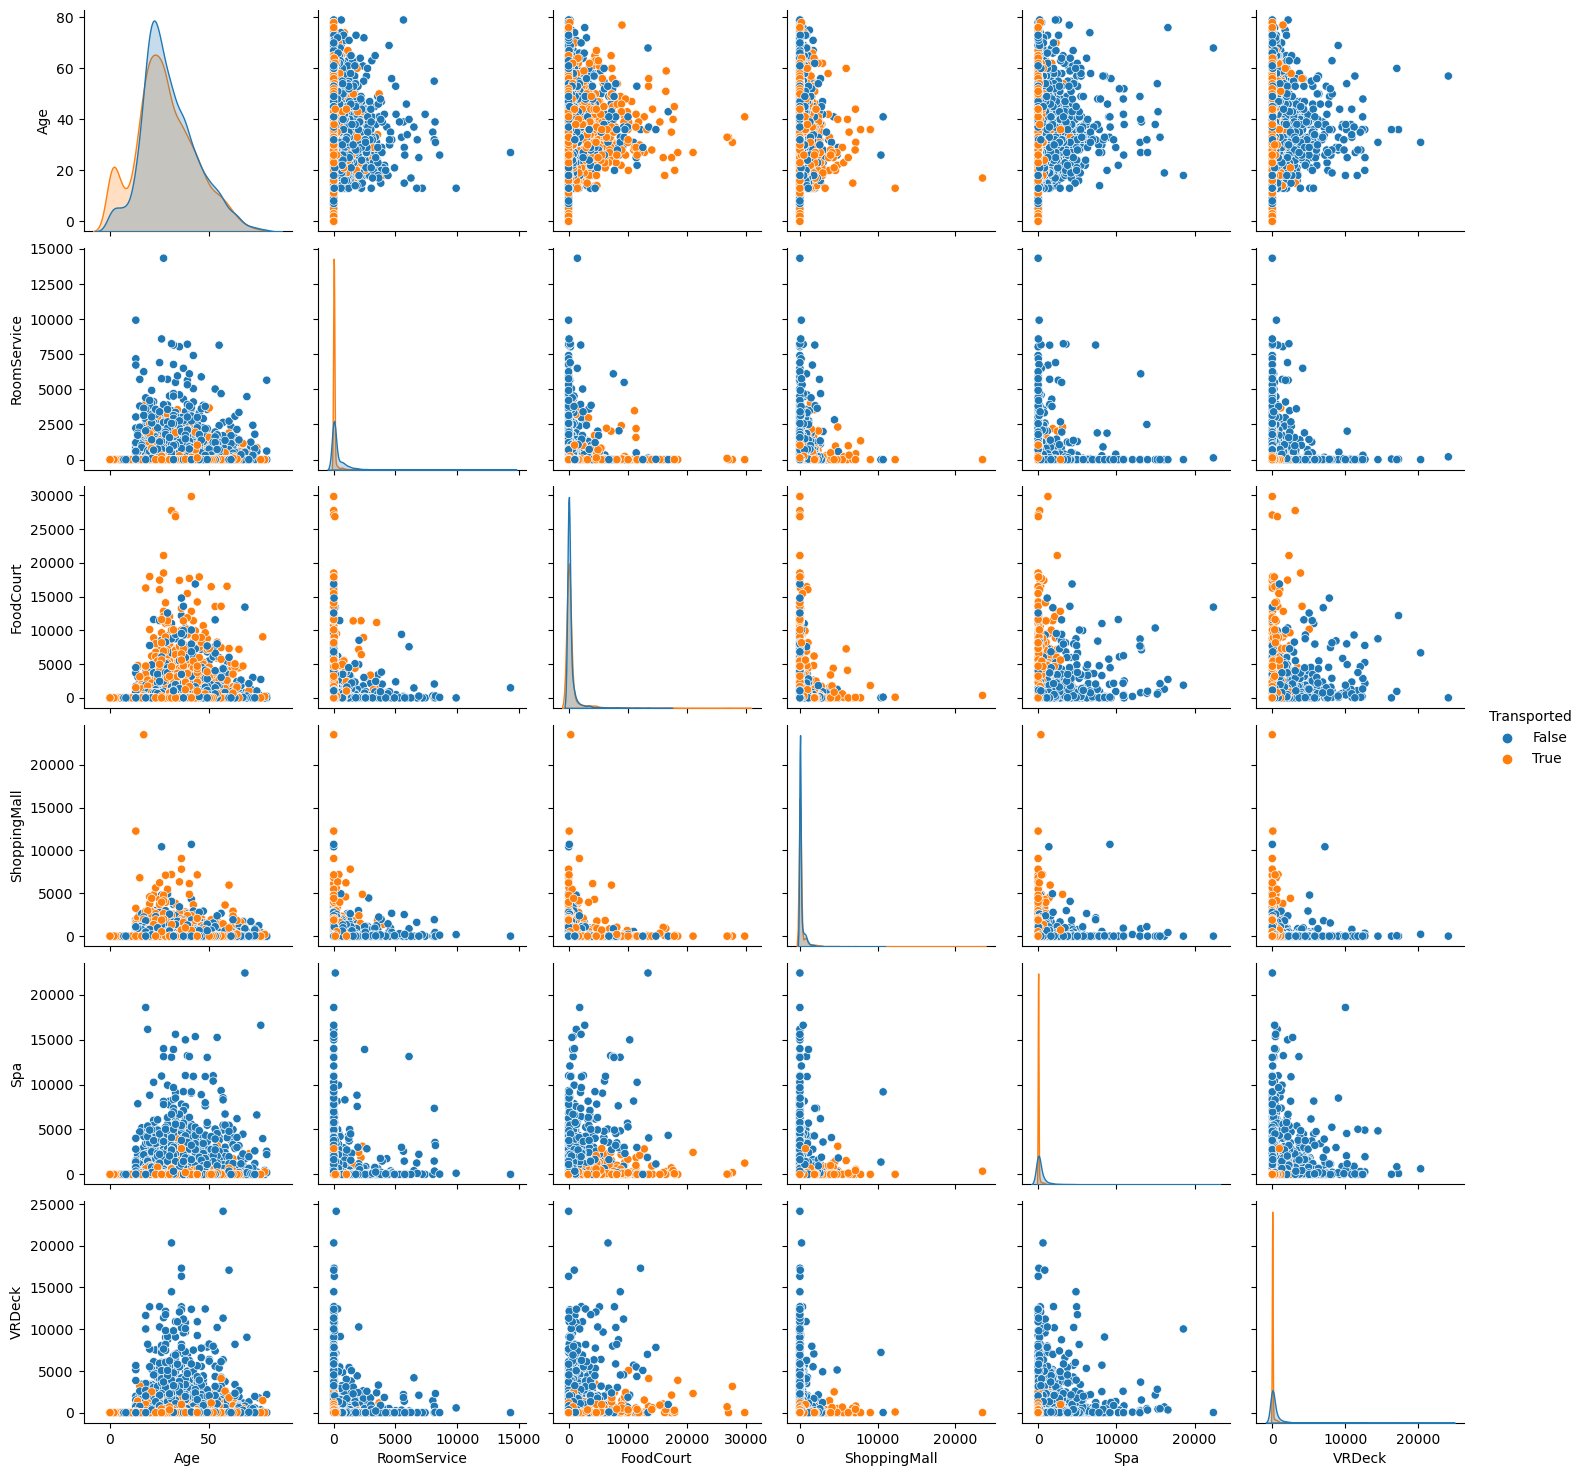

In [47]:
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.pairplot(train[num_cols + ['Transported']], hue='Transported');

In [48]:
train[num_cols].corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


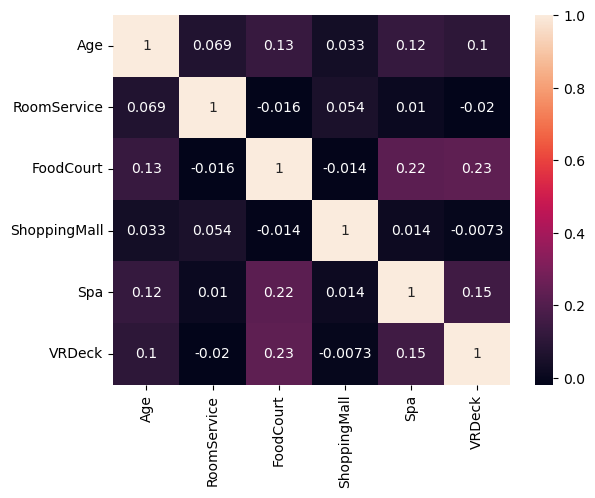

In [49]:
sns.heatmap(train[num_cols].corr(), annot=True);

Text(0.5, 0, 'Age (years)')

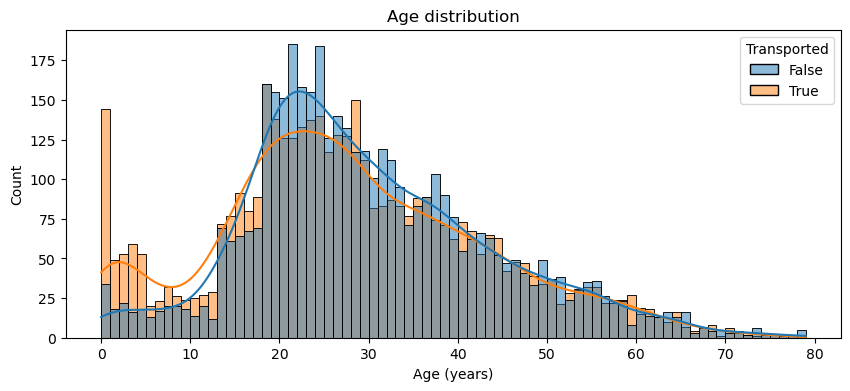

In [69]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

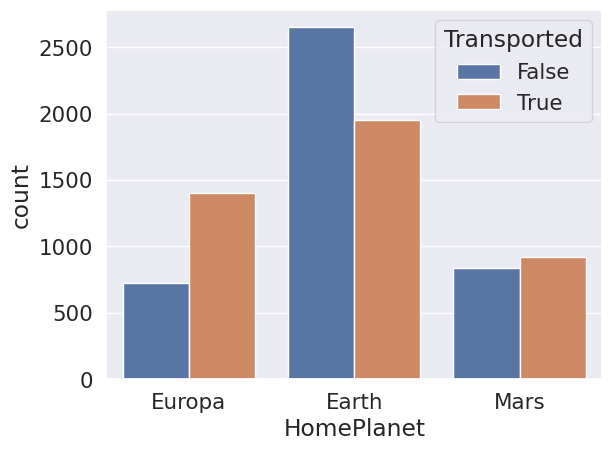

In [76]:
sns.countplot(train[cat_cols + ['Transported']], x='HomePlanet', hue='Transported');

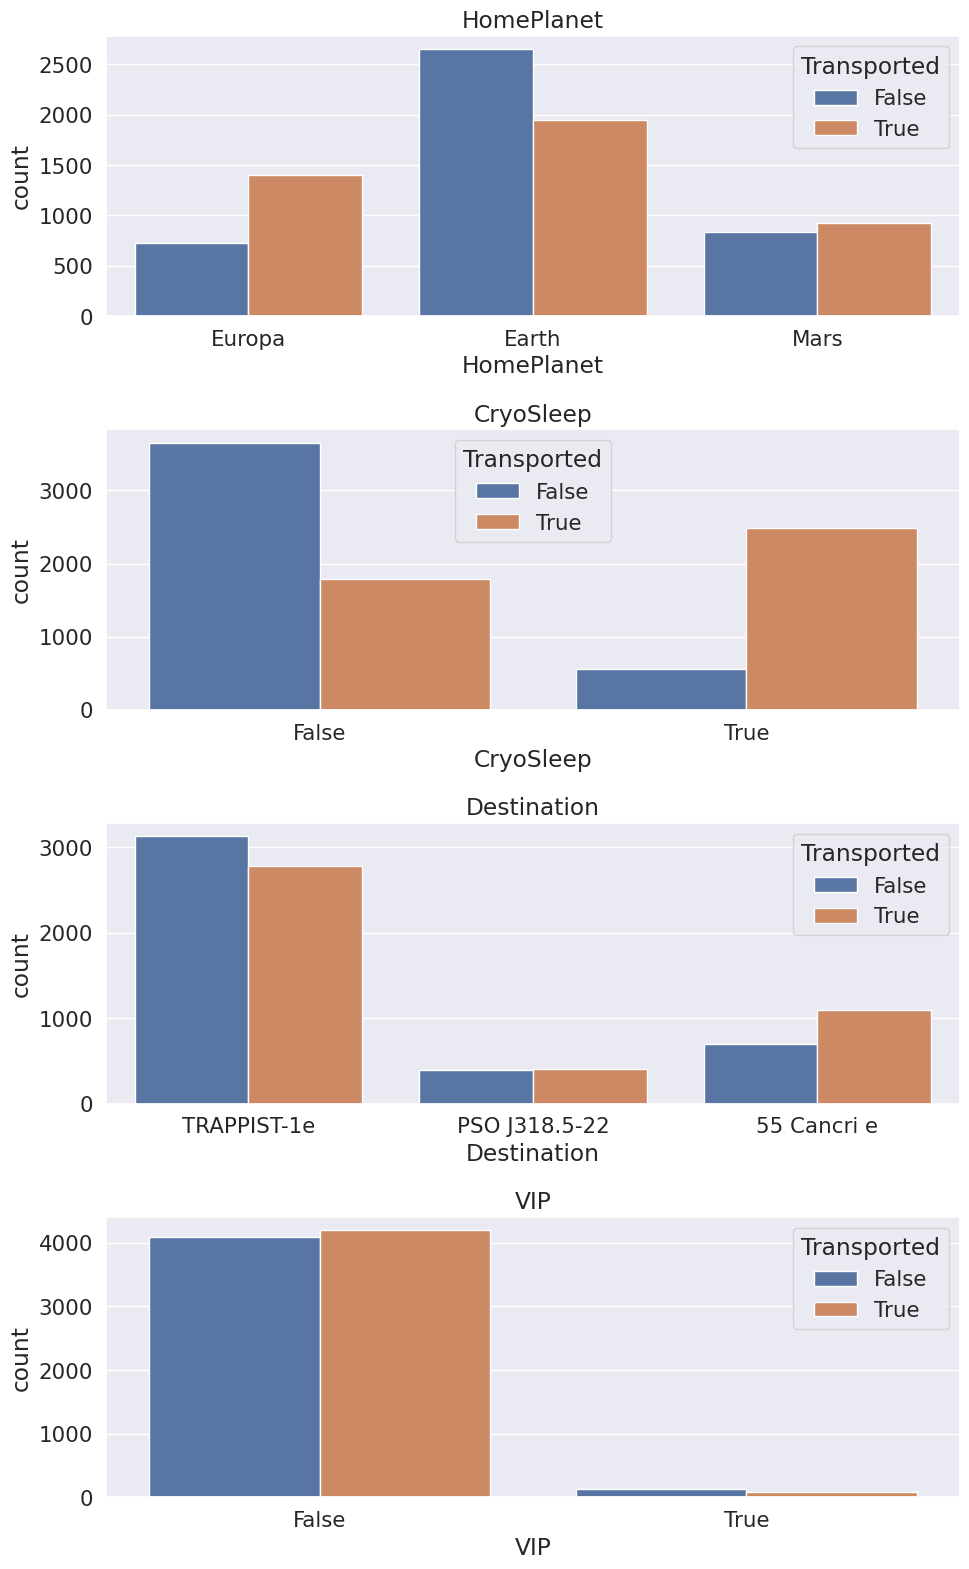

In [77]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

VIP выглядит как бесполезная фича, поскольку она имеет одинаковые распределения - 50 на 50 - независимо от значения 
таргета

Смело дропаем её из модели

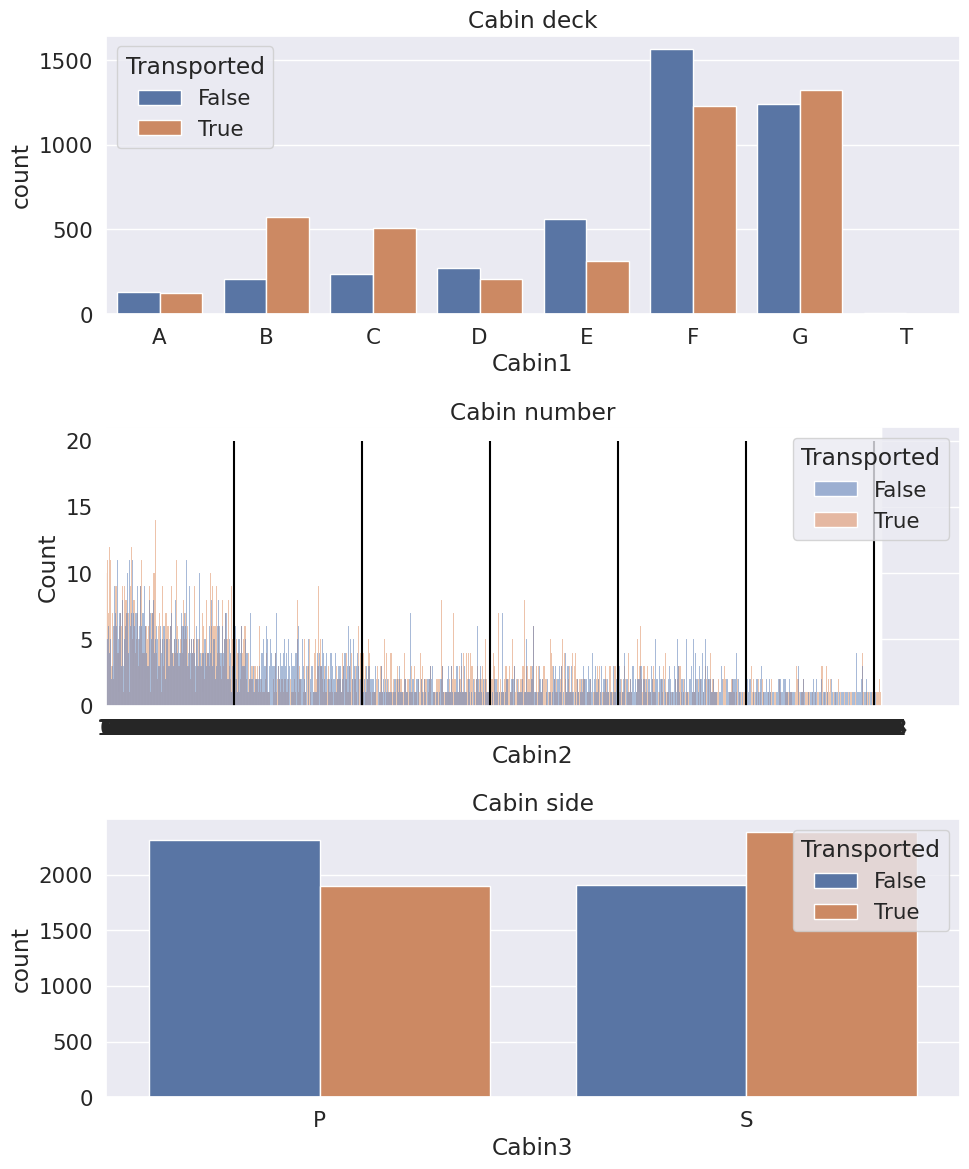

In [84]:
# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin1', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin2', hue='Transported',binwidth=40)
plt.vlines(300, ymin=0, ymax=20, color='black')
plt.vlines(600, ymin=0, ymax=20, color='black')
plt.vlines(900, ymin=0, ymax=20, color='black')
plt.vlines(1200, ymin=0, ymax=20, color='black')
plt.vlines(1500, ymin=0, ymax=20, color='black')
plt.vlines(1800, ymin=0, ymax=20, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin3', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

In [54]:
train[train['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,Cabin1,Cabin2,Cabin3
59,0064_02,NaN,True,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,True,Colatz,Keen,E,3,S
113,0119_01,NaN,False,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,False,Batan,Coning,A,0,P
186,0210_01,NaN,True,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,True,Arraid,Inicont,D,6,P
225,0242_01,NaN,False,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,False,Almone,Sté,F,46,S
234,0251_01,NaN,True,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,True,Diphah,Amsive,C,11,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,False,Jurs,Mone,E,582,P
8613,9194_01,NaN,False,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,False,NaN,NaN,E,603,S
8666,9248_01,NaN,False,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,True,Gian,Perle,F,1792,S
8674,9257_01,NaN,False,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,False,Ties,Apple,F,1892,P


In [55]:
train_cleared = train.copy()

In [56]:
# удалим строки с nan
train_cleared = train_cleared.dropna(inplace=False)
train_cleared

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,Cabin1,Cabin2,Cabin3
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Gravior,Noxnuther,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Kurta,Mondalley,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Fayey,Connon,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Celeon,Hontichre,E,608,S


In [61]:
# удаляем колонку VIP
cols_2_drop = ["VIP"]
cols_2_drop = cols_2_drop + ['PassangerId', 'FirstName', 'LastName', 'Cabin1', 'Cabin2', 'Cabin3']
train_cleared = train_cleared.drop(cols_2_drop, axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # создали объект скейлера

# методы скейлера: fit(), fit_transform(), transform()

# fit() sc.fit() - просто обучили скейлер
# fit_transform() - обучает скейлер и возращает результат преобразования
# transform() - просто возвращает резултат преобразования

# для трейна делаешь fit_transform, а для валидации и теста - transform

train_cleared[num_cols] = sc.fit_transform(train_cleared[num_cols])
train_cleared

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,0.695413,False,-0.345756,-0.285355,-0.309494,-0.273759,-0.269534,False
1,Earth,False,TRAPPIST-1e,-0.336769,False,-0.176748,-0.279993,-0.266112,0.206165,-0.230494,True
2,Europa,False,TRAPPIST-1e,2.002842,True,-0.279083,1.845163,-0.309494,5.596357,-0.226058,False
3,Europa,False,TRAPPIST-1e,0.282540,False,-0.345756,0.479034,0.334285,2.636384,-0.098291,False
4,Earth,False,TRAPPIST-1e,-0.887266,False,0.124056,-0.243650,-0.047470,0.220152,-0.267759,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.833037,True,-0.345756,3.777285,-0.309494,1.162518,-0.203876,False
8689,Earth,True,PSO J318.5-22,-0.749641,False,-0.345756,-0.285355,-0.309494,-0.273759,-0.269534,False
8690,Earth,False,TRAPPIST-1e,-0.199145,False,-0.345756,-0.285355,2.938900,-0.272885,-0.269534,True
8691,Europa,False,55 Cancri e,0.213728,False,-0.345756,0.339621,-0.309494,0.034826,2.600774,False


## One-Hot Encoding

Пусть у нас есть признак , который принимает три значения. 
Тогда мы можем его преобразовать в три признака. Для каждого значения по признаку

- 1 - [1, 0, 0]
- 2 - [0, 1 ,0]
- 3 - [0, 0, 1]

- 1 - [1, 0]
- 2 - [0, 1]
- 3 - [0, 0]

In [63]:
cat_cols1 = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
train_cleared = pd.get_dummies(train_cleared, columns=cat_cols1, drop_first=True)
train_cleared

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.695413,-0.345756,-0.285355,-0.309494,-0.273759,-0.269534,False,1,0,0,0,1,0
1,-0.336769,-0.176748,-0.279993,-0.266112,0.206165,-0.230494,True,0,0,0,0,1,0
2,2.002842,-0.279083,1.845163,-0.309494,5.596357,-0.226058,False,1,0,0,0,1,1
3,0.282540,-0.345756,0.479034,0.334285,2.636384,-0.098291,False,1,0,0,0,1,0
4,-0.887266,0.124056,-0.243650,-0.047470,0.220152,-0.267759,True,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.833037,-0.345756,3.777285,-0.309494,1.162518,-0.203876,False,1,0,0,0,0,1
8689,-0.749641,-0.345756,-0.285355,-0.309494,-0.273759,-0.269534,False,0,0,1,1,0,0
8690,-0.199145,-0.345756,-0.285355,2.938900,-0.272885,-0.269534,True,0,0,0,0,1,0
8691,0.213728,-0.345756,0.339621,-0.309494,0.034826,2.600774,False,1,0,0,0,0,0


- OrdinalEncoder - кодирует числами
- Label Encoder - тоже самое, но подходит только для кодирования целевой переменной (таргет)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score

X_train = train_cleared.drop(target, axis=1, inplace=False)
y_train = train_cleared[target]
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [66]:
preds = lr.predict(X_train)

print('ROC-AUC', roc_auc_score(y_train, preds))
print('ACCURACY', accuracy_score(y_train, preds))
print('RECALL', recall_score(y_train, preds))
print('PRECISION', precision_score(y_train, preds))

ROC-AUC 0.7894487174304555
ACCURACY 0.789585225552528
RECALL 0.8082356477306883
PRECISION 0.7814588782330718
